### Augment Training Data Image Files

Name: Alistair Clarke

Date: Oct 28th, 2018

In [2]:
# Import necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from PIL import Image

### Add Random Noise

In [3]:
from skimage.util import random_noise

# Read in image file

img_file = 'apple_1.jpg'

image = io.imread(img_file)

# Apply noise filter

noisy_img = random_noise(image)

Original Image


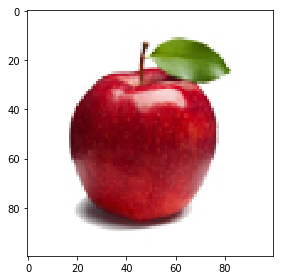

In [4]:
print("Original Image")

io.imshow(image)

Noisy Image


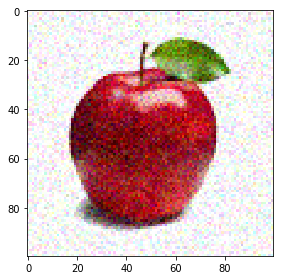

In [5]:
print("Noisy Image")

io.imshow(noisy_img)

### Gray Scaled Image

In [6]:
from skimage.color import rgb2gray

# Apply grayscale filter to original image

gray_img = rgb2gray(image)

In [12]:
#print("Dimensions:", gray_img.ndim)

#image.ndim 

a = np.array([1,2,3])

print(a.ndim)

b = np.array([[4,6,7],[1,2,3]])

print(b.ndim)

c = np.array([[[1,2,3],[4,5,6],[7,8,9]]])

print(c.ndim)

d = np.array([[[[1,2,3],[4,5,6],[7,6,5]]]])

print(d.ndim)

1
2
3
4


In [ ]:
### Rescale Intensity with added color contrast

from skimage import exposure
from skimage.transform import rescale

v_min, v_max = np.percentile(image, (0.2, 99.8))
contrast_img = exposure.rescale_intensity(image, in_range=(v_min, v_max))

In [ ]:
print("Higer Contrast Image")

io.imshow(contrast_img)

### Gamma Filter: Desaturate Image

In [ ]:
# Apply Gamma filter

gamma_img = exposure.adjust_gamma(image, gamma=0.2, gain=0.8)

In [ ]:
print("Gamma Image")

io.imshow(gamma_img)

In [ ]:
### Flip Image Horizontally

horizontal_flip = image[:,::-1]

In [ ]:
print("Horizontally Flipped Image")

io.imshow(horizontal_flip)

In [ ]:
### Vertically Flipped Image

vertical_flip = image[::-1, :]

In [ ]:
io.imshow(vertical_flip)

In [ ]:
### Blurred Image

from scipy import ndimage

blured_img = ndimage.uniform_filter(image, size=(11,7,1))

io.imshow(blured_img)

### Augmentation Functions

- Noise
- Grayscale 
- High Contrast
- Gamma (Desaturation)
- Flip Horizontally
- Flip Vertically
- Blur

In [ ]:
import random
import os

def random_num():
        
    num = random.randint(0, 50)
        
    return num    

In [ ]:
def original_img(image, path, name):
        
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_orig.png", image)

In [ ]:
# Noise Function

def add_noise(image, path, name):
    
    # Apply noise filter

    noisy_img = random_noise(image)
    
    #nimage = str(noisy_img) + '/noise'
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_noise.png", noisy_img)

In [ ]:
# Grayscale Function

def add_gray(image, path, name):
    
    # Apply grayscale filter to original image

    gray_img = rgb2gray(image)
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_gray.png", gray_img)

In [ ]:
# High Contrast Function

def add_contrast(image, path, name):
    
    # Compute percentile between values 0.2 and 99.8 inclusively
    # Computes the median color values
    
    v_min, v_max = np.percentile(image, (0.2, 99.8))
    
    # Set the exposure of the image to reflect the median color values
    
    contrast_img = exposure.rescale_intensity(image, in_range=(v_min, v_max))
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_contrast.png", contrast_img)

In [ ]:
# Gamma Function

def add_gamma(image, path, name):
    
    # Apply Gamma filter
    # Gamma, Gain values range 0-1 

    gamma_img = exposure.adjust_gamma(image, gamma=0.2, gain=0.8)
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_gamma.png", gamma_img)

In [ ]:
# Flip Horizontally Function

def flip_horizon(image, path, name):
    
    ### Flip Image Horizontally

    horizontal_flip = image[:,::-1]
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_hflip.png", horizontal_flip)

In [ ]:
# Flip Vertically Function

def flip_vertical(image, path, name):
    
    ### Flip Image Horizontally

    vertical_flip = image[::-1,:]
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_vflip.png", vertical_flip)

In [ ]:
# Blur Function

def add_blur(image, path, name):
    
    # Apply scipy ndimage blur
    
    blurred_img = ndimage.uniform_filter(image, size=(11,7,1))
    
    number = random_num()    
        
    # Save new image
    
    io.imsave(path + name + "_" + str(number) + "_blur.png", blurred_img)

In [ ]:
### Augment All New Images Function

def aug_images(path, name):
    
    for root, dirs, files in os.walk(path):
        for file_ in files:
            img_file = os.path.join(root, file_)
            
            # Read image file
        
            image = io.imread(img_file)
            
            # Destination path
            
            PATH = 'C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/new-data/orange/'
            
            # Call Functions
            
            original_img(image, PATH, name)    
            
            
    return print('Augmentation Completed!')

In [ ]:
aug_images('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/new-training-data/Orange', 'orange')